### [3 x n 타일링](https://school.programmers.co.kr/learn/courses/30/lessons/12902?language=python3)

- 점화식 기반으로 재귀적으로 풀이 -> 큰 n을 대상으로 할 경우 시간초과

In [7]:
def solution(n):
    
    if n == 0:
        return 1
    if n == 2:
        return 3
    if n < 2:
        return 0

    # 점화식: T(n) = 3 * T(n-2) + 2 * (T(n-4) + T(n-6) + ...)
    result = 3 * solution(n - 2)
    i = 4
    while i <= n:
        result += 2 * solution(n - i)
        i += 2
    
    return result % 1_000_000_007

- DP를 이용해 조금 더 최적화  
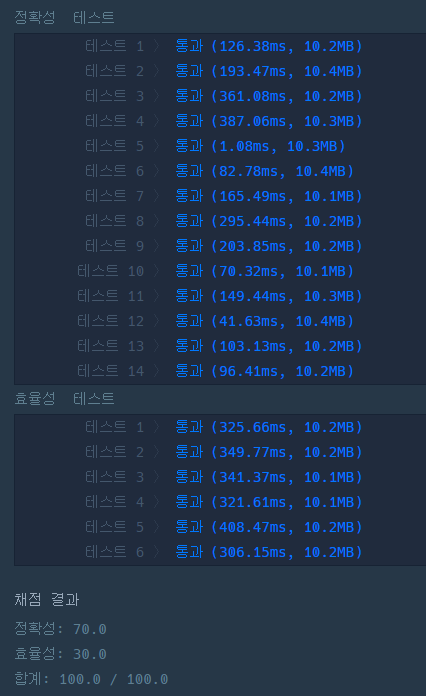

In [3]:
def solution(n):
    if n % 2 != 0:
        return 0  # 홀수일 경우 타일을 채울 수 없으므로 0 반환

    MOD = 1_000_000_007

    # DP 테이블 초기화
    dp = [0] * (n + 1)
    dp[0] = 1  # 아무 타일도 놓지 않은 경우는 1가지
    if n >= 2:
        dp[2] = 3  # 2칸을 채우는 방법은 3가지
    
    for i in range(4, n + 1, 2):
        dp[i] = dp[i - 2] * 3
        for j in range(4, i + 1, 2):
            dp[i] += dp[i - j] * 2
        dp[i] %= MOD  # 나머지 연산

    return dp[n] % 1_000_000_007

41


- 다른 사람의 풀이....감탄...

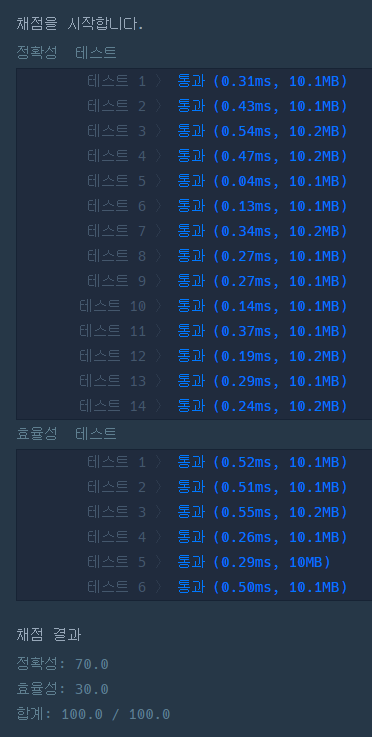

In [10]:
def solution(n):
    if n % 2:
        return 0
    front = back = 1
    for _ in range(n//2):
        front, back = back, (4*back - front) % 1000000007
    return back

- 위 코드에 사용된 수식은 아래와 같음.  
T(n)=4×T(n−2)−T(n−4)